## Random Forest Algorithm

### 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame

In [2]:
# importing data
df = pd.read_csv('./breast-cancer-wisconsin-data/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
# removing the columns of unwanted features
features_to_delete = ['perimeter_mean', 'area_mean','perimeter_se', 'area_se','radius_worst', 'perimeter_worst','concavity_mean', 
                 'compactness_mean','concavity_worst', 'concave points_worst','fractal_dimension_mean','texture_se',
                  'smoothness_se','symmetry_se','diagnosis','Unnamed: 32','id']
x = df.drop(features_to_delete,axis=1)
# x.head()
x.shape

(569, 16)

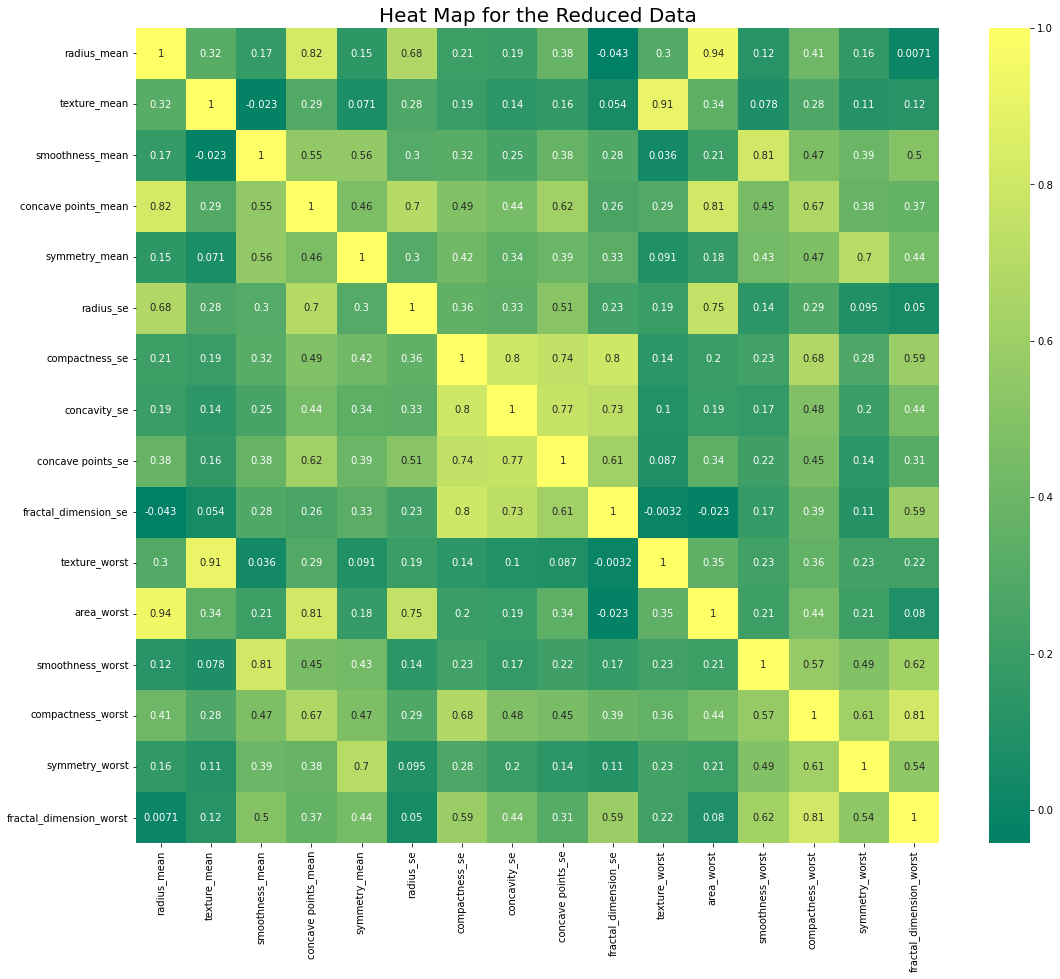

In [6]:
# generating heatmap of the reduced features.
# Note that the fetures removed are based on the observations made from data visualisation.
# It is NOT determined by Random Forest Algorithm.
plt.rcParams['figure.figsize'] = (18, 15)
sns.heatmap(x.corr(), annot = True, cmap = 'summer')
plt.title('Heat Map for the Reduced Data', fontsize = 20)
plt.show()

In [7]:
y = df['diagnosis'] # dependant variable

In [8]:
# label encoding of the dependent variable
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
y = le.fit_transform(y)

### Training and Testing Datasets

In [9]:
#splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,  # test data is 20% of total data
                                                    random_state = 16) # random_state shuffles the data with every execution
                                                                               
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)

Shape of x_train : (455, 16)
Shape of x_test : (114, 16)


### Model Evaluation

In [10]:
# importing libraries for modelling using Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)
# max_depth specifies max depth of each tree
# n_estimators specifies the maximum no of trees that we want to build before making prediction/taking max votes 

In [12]:
# feeding the training set into the model
model.fit(x_train, y_train) #fitting training data

RandomForestClassifier(max_depth=10, n_estimators=400)

In [13]:
# predicting the test set results
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0])

Is it needed to improvise the model as a lot of values are eual to 1?

#### 1. Accuracy

In [14]:
# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuarcy : 0.9736842105263158


#### 2. Confusion Matrix

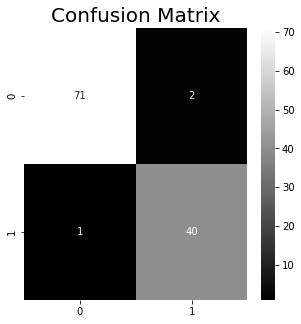

In [15]:
# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'gray')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

#### 3. Precision

In [16]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

Precision:  0.9523809523809523


#### 4. Recall

In [17]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  0.975609756097561


### Using RFECV
* `RFECV` chooses best set of features in data when used with linear or tree-based models(here, Random Forest)
* We initially start with all the features. For every step or iteration the worst x number of features (i.e the features which have the lowest feature importances in case of tree-based models and and the features which have the lowest absolute value in case of linear models) are eliminated using the "step" parameter till `n_features` are left. If you notice, you need to provide the n_features parameter in the constructor.
* The RFECV object helps to tune or find this n_features parameter using `cross-validation`. For every step where `step` number of features are eliminated, it calculates the score on the validation data. The number of features left at the step which gives the maximum score on the validation data, is considered to be `the best n_features` of your data.

In [18]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = RandomForestClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 13
Best features : Index(['radius_mean', 'texture_mean', 'concave points_mean', 'radius_se',
       'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#### Classification report after using RFECV
Optimal number of features vary with each execution

Training Accuracy : 1.0
Testing Accuracy : 0.9736842105263158


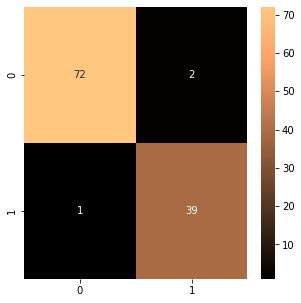

In [19]:
y_pred = rfecv.predict(x_test)

print("Training Accuracy :", rfecv.score(x_train, y_train))
print("Testing Accuracy :", rfecv.score(x_test, y_test))

cm = confusion_matrix(y_pred, y_test)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()